# 📱Project Title

###  MobileSphere: Data-Driven Analysis and Insights of Mobile Phone Sales and Trends

<h1 align="center">MobileSphere Dashboard</h1>

<p align="center">
  <img src="images/MobileSphere.png" width="900">
</p>

# 📌 Introduction

##### In today’s digital era, smartphones play a vital role in communication, business, education, and entertainment. The mobile phone market is highly competitive, with numerous brands offering devices with different prices, specifications, and popularity levels. Analyzing mobile sales data helps businesses and consumers understand market trends, customer preferences, and brand performance.

##### MobileSphere is a data science project designed to analyze mobile phone sales data using Python and data visualization techniques. The project focuses on extracting meaningful insights such as top-performing brands, pricing patterns, popularity trends, and key performance indicators (KPIs). These insights support better decision-making for manufacturers, sellers, and customers.


# 🎯 Objectives of the Project

##### The main objectives of the MobileSphere project are:

##### 1) To analyze mobile phone sales data using data science techniques

##### 2) To identify top brands based on popularity and sales performance

##### 3) To study price variation and its impact on popularity

##### 4) To calculate important KPIs for business insights

##### 5) To visualize data using charts and dashboards for easy understanding

##### 6) To support data-driven decision making in the mobile phone market

<p align="center">
  <img src="images/MObleAnalysis.png" width="700">
</p>

# ❓ Problem Statement

##### The mobile phone industry generates a large volume of data related to pricing, brands, specifications, and popularity. However, this data is often underutilized due to a lack of proper analysis and visualization.

##### The problem is to analyze and transform raw mobile sales data into meaningful insights that answer key business questions such as:

##### - Which brands perform best in the market?

##### - How does price affect popularity?

##### - What are the most important KPIs for mobile sales analysis?

##### MobileSphere aims to solve this problem by applying data cleaning, analysis, and visualization techniques to convert raw data into actionable insights.

# Import Tools

In [42]:
import pandas as pd 
import numpy as np
import xgboost as xgb
import seaborn as sb
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# LOAD DATASET

In [2]:
df= pd.read_excel("E:\\BA BI\\Project BBC\\project1\\Phone_Sales_Dataset.xlsx")

In [3]:
df

,brand_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
0,ALCATEL,Android,422,1690,1529.0,1819.0,36,5.00,8.0,2000.0
1,ALCATEL,Android,323,1803,1659.0,2489.0,36,5.00,16.0,2000.0
2,ALCATEL,Android,299,1803,1659.0,2489.0,36,5.00,16.0,2000.0
3,ALCATEL,Android,287,1803,1659.0,2489.0,36,5.00,16.0,2000.0
4,Nokia,Android,1047,1999,NaN,NaN,10,5.71,16.0,3000.0
...,...,...,...,...,...,...,...,...,...,...
1219,Apple,iOS,1101,22685,16018.0,27900.0,61,6.50,64.0,3174.0
1220,Apple,iOS,530,24600,21939.0,33720.0,28,6.50,64.0,3174.0
1221,HUAWEI,Android,1174,8804,7999.0,9999.0,18,6.26,128.0,3750.0
1222,ZTE,Android,752,18755,18500.0,19010.0,2,6.65,128.0,4500.0


### 📊 MobileSphere Dataset – Column Explanation & Full Forms
#### 1️⃣ brand_name

##### Description: Name of the mobile phone manufacturer

##### Example: Apple, Nokia, Samsung, ALCATEL

##### Use in Analysis: Helps identify top-performing brands and brand-wise trends

#### 2️⃣ os

##### Full Form: Operating System

##### Description: Software platform used by the mobile phone

##### Common Values: Android, iOS

##### Use in Analysis: OS-based comparison of popularity and pricing

#### 3️⃣ popularity

##### Description: A numerical score representing how popular a mobile phone is

##### Higher Value Means: More user interest or demand

##### Use in Analysis: Used to find most popular phones and brands

#### 4️⃣ best_price

##### Description: Best available selling price of the mobile phone

##### Meaning: The most competitive or recommended price

##### Use in Analysis: Pricing comparison and affordability analysis

#### 5️⃣ lowest_price

##### Description: Minimum price at which the mobile phone is sold

##### May Contain: NaN (price not available)

##### Use in Analysis: Helps identify cheapest offers

#### 6️⃣ highest_price

##### Description: Maximum price at which the mobile phone is sold

##### May Contain: NaN (price not available)

##### Use in Analysis: Used to study price range and variability

#### 7️⃣ sellers_amount

##### Description: Total number of sellers offering the mobile phone

##### Higher Value Means: Product is widely available

##### Use in Analysis: Measures market availability and competition

#### 8️⃣ screen_size

##### Unit: Inches

##### Description: Diagonal size of the mobile phone display

##### Example: 5.5, 6.1, 6.5 inches

##### Use in Analysis: Screen size preference analysis

#### 9️⃣ memory_size

##### Unit: GB (Gigabytes)

##### Description: Internal storage capacity of the phone

##### Example: 16GB, 64GB, 128GB

##### Use in Analysis: Feature comparison and value-for-money analysis

#### 🔟 battery_size

##### Unit: mAh (milliampere-hour)

##### Description: Battery capacity of the mobile phone

##### Higher Value Means: Longer battery life

##### Use in Analysis: Performance and durability comparison

# Data Cleaning Process

In [4]:
df.shape

(1224, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1224 non-null   object 
 1   os              1027 non-null   object 
 2   popularity      1224 non-null   int64  
 3   best_price      1224 non-null   int64  
 4   lowest_price    964 non-null    float64
 5   highest_price   964 non-null    float64
 6   sellers_amount  1224 non-null   int64  
 7   screen_size     1222 non-null   float64
 8   memory_size     1112 non-null   float64
 9   battery_size    1214 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 95.8+ KB


In [6]:
df.describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1224.000000,1224.000000,964.000000,964.000000,1224.000000,1222.000000,1112.000000,1214.000000
mean,612.500000,7941.206699,7716.018672,9883.410788,16.743464,5.394378,95.700059,3608.201812
std,353.482673,8891.836260,8560.959059,11514.936818,20.597006,1.476991,111.922576,1668.268774
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,306.750000,2599.750000,2399.000000,2887.000000,2.000000,5.162500,32.000000,2900.000000
50%,612.500000,4728.000000,4574.000000,5325.500000,8.000000,6.000000,64.000000,3687.000000
75%,918.250000,9323.000000,9262.250000,12673.750000,26.000000,6.400000,128.000000,4400.000000
max,1224.000000,56082.000000,49999.000000,69999.000000,125.000000,8.100000,1000.000000,18800.000000


In [7]:
df.isnull().sum()

brand_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
dtype: int64

In [8]:
df['memory_size'] = df['memory_size'].fillna(df['memory_size'].median())

df['battery_size'] = df['battery_size'].fillna(df['battery_size'].median())

df['screen_size'] = df['screen_size'].fillna(df['screen_size'].median())

df['lowest_price'] = df['lowest_price'].fillna(df['best_price'])

df['highest_price'] = df['highest_price'].fillna(df['best_price'])

df['os'] = df['os'].fillna(df['os'].mode)

In [9]:
df

,brand_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
0,ALCATEL,Android,422,1690,1529.0,1819.0,36,5.00,8.0,2000.0
1,ALCATEL,Android,323,1803,1659.0,2489.0,36,5.00,16.0,2000.0
2,ALCATEL,Android,299,1803,1659.0,2489.0,36,5.00,16.0,2000.0
3,ALCATEL,Android,287,1803,1659.0,2489.0,36,5.00,16.0,2000.0
4,Nokia,Android,1047,1999,1999.0,1999.0,10,5.71,16.0,3000.0
...,...,...,...,...,...,...,...,...,...,...
1219,Apple,iOS,1101,22685,16018.0,27900.0,61,6.50,64.0,3174.0
1220,Apple,iOS,530,24600,21939.0,33720.0,28,6.50,64.0,3174.0
1221,HUAWEI,Android,1174,8804,7999.0,9999.0,18,6.26,128.0,3750.0
1222,ZTE,Android,752,18755,18500.0,19010.0,2,6.65,128.0,4500.0


In [10]:
df.isnull().sum()

brand_name        0
os                0
popularity        0
best_price        0
lowest_price      0
highest_price     0
sellers_amount    0
screen_size       0
memory_size       0
battery_size      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df["highest_price"] = df["highest_price"].astype("int")
    
df["highest_price"].dtypes

dtype('int32')

In [13]:
df["lowest_price"] = df["lowest_price"].astype("int")

df["lowest_price"].dtypes

dtype('int32')

In [14]:
df.dtypes

brand_name         object
os                 object
popularity          int64
best_price          int64
lowest_price        int32
highest_price       int32
sellers_amount      int64
screen_size       float64
memory_size       float64
battery_size      float64
dtype: object

# Exploratory Data Analysis

C:\Users\hansa\AppData\Local\Temp\ipykernel_3776\3538265014.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Nagar=sb.barplot(df,x="brand_name",y="popularity" ,palette="tab20")
C:\Users\hansa\AppData\Local\Temp\ipykernel_3776\3538265014.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Nagar.set_xticklabels(labels, rotation=90)


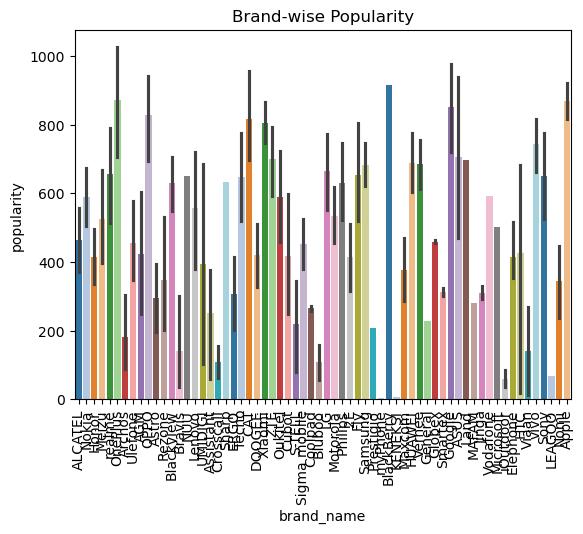

In [15]:
Nagar=sb.barplot(df,x="brand_name",y="popularity" ,palette="tab20")
labels = Nagar.get_xticklabels()
Nagar.set_xticklabels(labels, rotation=90)
plt.title("Brand-wise Popularity")
plt.show()

##### The graph is a bar plot showing the popularity of different mobile phone brands. Each bar represents a brand (brand_name) on the x-axis, while the height of the bar represents its popularity score on the y-axis. The x-axis labels are rotated 90 degrees for better readability since there may be multiple brands.

##### From this graph, we can compare brands easily and see which brands are more popular among users. Taller bars indicate higher popularity, while shorter bars indicate lower popularity. The color palette (tab20) is used to differentiate the brands visually, making it easier to distinguish between them.

##### This visualization is helpful for identifying market trends, such as which brands are currently leading in popularity and which brands might need more marketing focus.

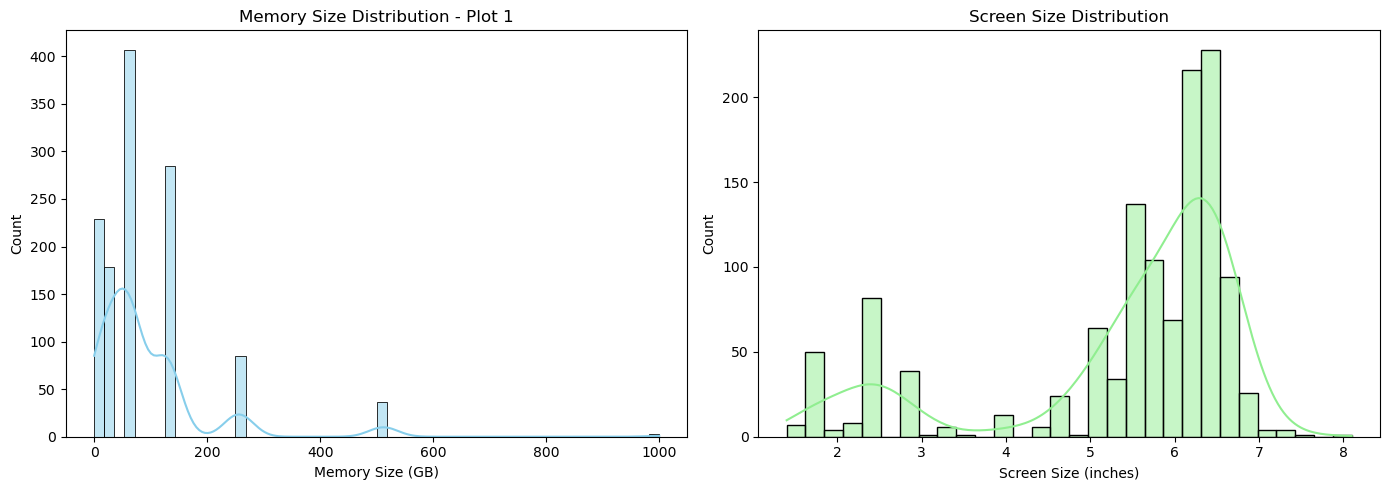

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# First histogram
sb.histplot(df, x="memory_size", kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Memory Size Distribution - Plot 1")
axes[0].set_xlabel("Memory Size (GB)")
axes[0].set_ylabel("Count")

# Second histogram
sb.histplot(df, kde=True, x="screen_size", ax=axes[1], color="lightgreen")
axes[1].set_title("Screen Size Distribution")
axes[1].set_xlabel("Screen Size (inches)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

#### The two histograms show the distribution of mobile phone specifications: memory size and screen size.

#### 1) Memory Size Distribution (left graph):

##### -> Shows how mobile phones are distributed based on their memory (RAM or internal storage).

##### -> Peaks in the graph indicate memory sizes that are most common among phones in the dataset.

##### -> The KDE (Kernel Density Estimate) line gives a smooth approximation of the distribution, making it easier to see trends.

##### -> For example, if the peak is around 4GB or 8GB, it shows most phones in the dataset have that memory size.

#### 2) Screen Size Distribution (right graph):

##### -> Shows how mobile phones are distributed based on their screen sizes.

##### -> Peaks indicate the most common screen sizes in the dataset.

##### -> The KDE line helps visualize the density of screen sizes and detect any trends, such as a preference for larger or smaller screens.

C:\Users\hansa\AppData\Local\Temp\ipykernel_3776\1173763207.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df["best_price"])


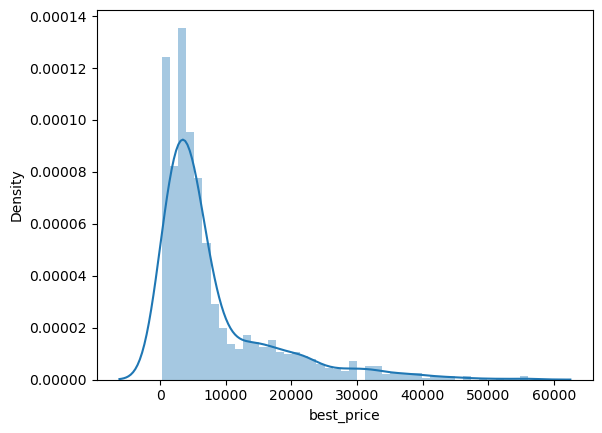

In [17]:
sb.distplot(df["best_price"])
plt.show()

#### Best Price Distribution (right):

##### -> Shows how phone prices are distributed across the dataset.

##### -> Peaks indicate the price ranges most phones fall into.

##### -> Helps identify common price points, and the KDE line shows price density.

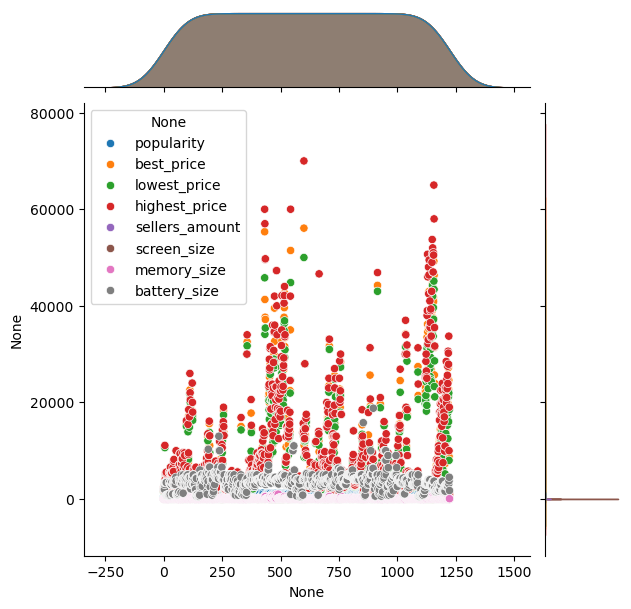

In [18]:
sb.jointplot(df)
plt.show()

#### 1) Scatter Plot (center):

##### -> Shows the relationship between pairs of numerical features in the dataset.

##### -> Each dot represents a mobile phone, and the colors correspond to different variables like popularity, best_price, lowest_price, highest_price, screen_size, memory_size, battery_size, and sellers_amount.

##### -> Overlapping points indicate that multiple phones share similar feature values.

#### 2) Marginal Distributions (top and right):

##### -> The top area shows the density distribution of the x-axis variable.

##### -> The right area shows the density distribution of the y-axis variable.

##### -> These KDE plots give a smooth estimate of the distribution, highlighting where most data points are concentrated.

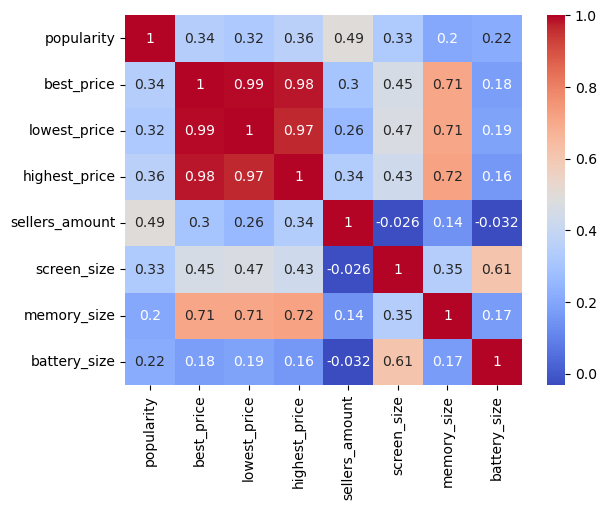

In [19]:
cor = df.corr(numeric_only=True)

sb.heatmap(cor, cmap="coolwarm", annot=True)
plt.show()

#### The heatmap visualizes the correlation matrix of numerical features in the mobile phone dataset. Correlation values range from -1 to 1, where:

##### 1 → perfect positive correlation (both variables increase together)

##### -1 → perfect negative correlation (one variable increases while the other decreases)

##### 0 → no correlation

#### Key observations from the heatmap:

#### 1) Price-related features are highly correlated:

##### -> best_price, lowest_price, and highest_price have very strong positive correlations with each other (0.97–0.99).

##### -> This is expected, as the lowest, best, and highest prices of a phone are naturally related.

#### 2) Popularity correlations:

##### -> popularity has a moderate positive correlation with sellers_amount (0.49), highest_price (0.36), best_price (0.34), and lowest_price (0.32).

##### -> This suggests that more popular phones tend to have slightly higher prices and more sellers.

#### 3) Memory size relationships:

##### -> memory_size has a strong positive correlation with prices: best_price (0.71), lowest_price (0.71), and highest_price (0.72).

##### -> This indicates that phones with larger memory tend to be more expensive.

#### 4) Screen size and battery size:

##### -> screen_size shows a moderate correlation with battery_size (0.61), suggesting that larger phones often have bigger batteries.

##### -> screen_size also has a mild correlation with best_price (0.45) and lowest_price (0.47), meaning bigger screens slightly increase price.

#### 5) Sellers amount correlations:

##### -> sellers_amount has very low correlations with screen_size (-0.026), memory_size (0.14), and battery_size (-0.032).

##### -> This indicates the number of sellers does not strongly depend on these specifications.

#### Insights:

##### -> Price is strongly influenced by memory size and somewhat by screen size.

##### -> Popularity is only moderately correlated with price and sellers, indicating other factors (like brand, features, or marketing) may affect popularity.

##### -> Battery and screen sizes are related, but they have minimal influence on price or popularity.

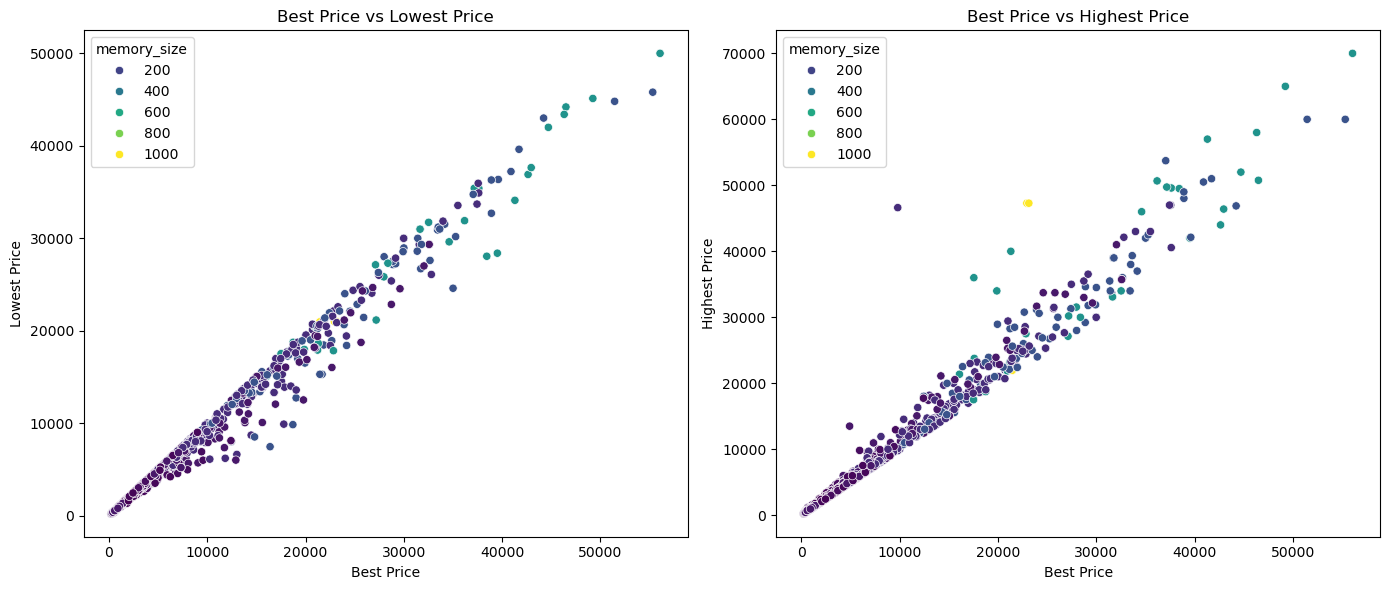

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Scatter plot: Best Price vs Lowest Price
sb.scatterplot(
    data=df, x="best_price", y="lowest_price", hue="memory_size",
    palette="viridis", ax=axes[0]
)
axes[0].set_title("Best Price vs Lowest Price")
axes[0].set_xlabel("Best Price")
axes[0].set_ylabel("Lowest Price")

# Scatter plot: Best Price vs Highest Price
sb.scatterplot(
    data=df, x="best_price", y="highest_price", hue="memory_size",
    palette="viridis", ax=axes[1]
)
axes[1].set_title("Best Price vs Highest Price")
axes[1].set_xlabel("Best Price")
axes[1].set_ylabel("Highest Price")

plt.tight_layout()  # Adjust spacing
plt.show()

#### 1) Best Price vs Lowest Price

##### -> X-axis → best_price: The most favorable selling price for a phone.

##### -> Y-axis → lowest_price: The lowest observed price in the market.

##### -> Hue → memory_size: Color shows different memory variants.

##### Interpretation:

##### ->      Points close to the diagonal indicate phones where the best price is close to the lowest price.

##### ->      A larger gap between best_price and lowest_price indicates some phones might be overpriced relative to the market minimum.

#### 1) Best Price vs Highest Price

##### -> X-axis → best_price: The most favorable selling price.

##### -> Y-axis → highest_price: The maximum price observed in the market.

##### -> Hue → memory_size: Again, color shows memory variants.

##### Interpretation:

##### ->      Points below the diagonal: best price is lower than the market maximum (good for buyers).

##### ->      Points closer to diagonal: best price is similar to the highest price (less competitive).

##### ->      Helps spot memory variants that are priced closer to peak market prices.

# Machine Learning Model To Use Get Right Accuracy

In [22]:
ndf=df.iloc[:,[0,2,3,6,7,8,9]]
ndf

,brand_name,popularity,best_price,sellers_amount,screen_size,memory_size,battery_size
0,ALCATEL,422,1690,36,5.00,8.0,2000.0
1,ALCATEL,323,1803,36,5.00,16.0,2000.0
2,ALCATEL,299,1803,36,5.00,16.0,2000.0
3,ALCATEL,287,1803,36,5.00,16.0,2000.0
4,Nokia,1047,1999,10,5.71,16.0,3000.0
...,...,...,...,...,...,...,...
1219,Apple,1101,22685,61,6.50,64.0,3174.0
1220,Apple,530,24600,28,6.50,64.0,3174.0
1221,HUAWEI,1174,8804,18,6.26,128.0,3750.0
1222,ZTE,752,18755,2,6.65,128.0,4500.0


In [23]:
le_brandname = LabelEncoder()
ndf['brand_name'] = le_brandname.fit_transform(df['brand_name'])
ndf.head()

C:\Users\hansa\AppData\Local\Temp\ipykernel_3776\1550365413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['brand_name'] = le_brandname.fit_transform(df['brand_name'])


,brand_name,popularity,best_price,sellers_amount,screen_size,memory_size,battery_size
0,2,422,1690,36,5.00,8.0,2000.0
1,2,323,1803,36,5.00,16.0,2000.0
2,2,299,1803,36,5.00,16.0,2000.0
3,2,287,1803,36,5.00,16.0,2000.0
4,38,1047,1999,10,5.71,16.0,3000.0


In [24]:
x=ndf.drop(["best_price"],axis=1)
y=ndf["best_price"]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
ms=MinMaxScaler()
ms.fit(x_train)

MinMaxScaler()

In [27]:
x_train_normalize=ms.transform(x_train)
x_test_normalize=ms.transform(x_test)

In [28]:
x_train_normalize=pd.DataFrame(x_train_normalize,columns=x_train.columns)
x_test_normalize=pd.DataFrame(x_test_normalize,columns=x_test.columns)

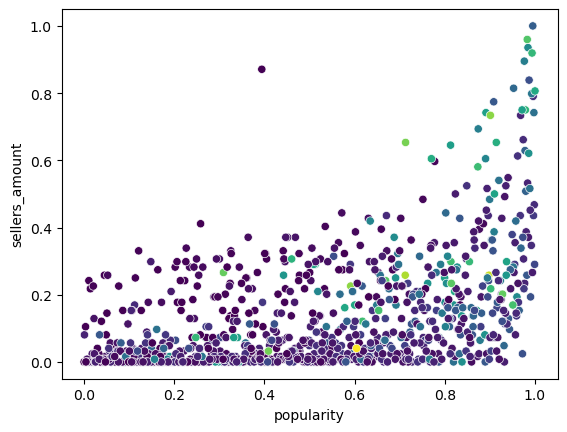

In [29]:
sb.scatterplot(data=ndf,x=x_train_normalize["popularity"],y=x_train_normalize["sellers_amount"],c=y_train)
plt.show()

### GradientBoosting Regression

In [30]:
Gbr=GradientBoostingRegressor()
Gbr.fit(x_train,y_train)


GradientBoostingRegressor()

In [31]:
y_predict=Gbr.predict(x_test)

In [32]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 2310.000875989072
MSE: 13262075.892293537
RMSE: 3641.7133182464454
R2 Score: 0.77218518577572


### Random Forest Regresion

In [33]:
Rtr=RandomForestRegressor(n_estimators=200,random_state=42,criterion="squared_error")
Rtr.fit(x_train,y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [34]:
y_pred=Rtr.predict(x_test)

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 1973.1705510204083
MSE: 13634522.102070712
RMSE: 3692.495376039178
R2 Score: 0.7657873363909017


### XGBoosting Regression

In [36]:
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [53]:
y_ped = xgb_model.predict(x_test)

mae = mean_absolute_error(y_test, y_ped)
mse = mean_squared_error(y_test, y_ped)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_ped)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 1933.789931628169
MSE: 11208316.462896015
RMSE: 3347.882384865994
R2 Score: 0.8074644804000854


In [ ]:
###Linear Regression

In [49]:
le=LinearRegression()
le.fit(x_train,y_train)
y_predicts=le.predict(x_test)

In [50]:
mae = mean_absolute_error(y_test, y_predicts)
mse = mean_squared_error(y_test, y_predicts)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predicts)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 3546.9567840031887
MSE: 27565444.881240867
RMSE: 5250.280457389002
R2 Score: 0.5264831271039054


In [51]:
dt=DecisionTreeRegressor(max_depth=15)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15)

In [52]:
y_preds=dt.predict(x_test)

mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 2420.565411402656
MSE: 24688476.330333736
RMSE: 4968.749976637357
R2 Score: 0.5759034487245094
